In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.compose import make_column_transformer, make_column_selector

import itertools

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("data.csv")

In [3]:
train.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [4]:
X = train.drop("character", axis=1)
y0 = train["character"]

In [5]:
print(y0.unique())
print(len(y0.unique()))

['character_01_ka' 'character_02_kha' 'character_03_ga' 'character_04_gha'
 'character_05_kna' 'character_06_cha' 'character_07_chha'
 'character_08_ja' 'character_09_jha' 'character_10_yna'
 'character_11_taamatar' 'character_12_thaa' 'character_13_daa'
 'character_14_dhaa' 'character_15_adna' 'character_16_tabala'
 'character_17_tha' 'character_18_da' 'character_19_dha' 'character_20_na'
 'character_21_pa' 'character_22_pha' 'character_23_ba' 'character_24_bha'
 'character_25_ma' 'character_26_yaw' 'character_27_ra' 'character_28_la'
 'character_29_waw' 'character_30_motosaw' 'character_31_petchiryakha'
 'character_32_patalosaw' 'character_33_ha' 'character_34_chhya'
 'character_35_tra' 'character_36_gya' 'digit_0' 'digit_1' 'digit_2'
 'digit_3' 'digit_4' 'digit_5' 'digit_6' 'digit_7' 'digit_8' 'digit_9']
46


In [6]:
binencoder = LabelBinarizer()
y = binencoder.fit_transform(y0)
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=90)

x_train = x_train/255
x_test = x_test/255

print(X.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(92000, 1024)
(73600, 1024)
(18400, 1024)
(73600, 46)
(18400, 46)


In [8]:
re_x_train = x_train.values.reshape(-1, 32, 32, 1)
re_x_test = x_test.values.reshape(-1, 32, 32, 1)

print(X.shape)
print(re_x_train.shape)
print(re_x_test.shape)
print(y_train.shape)
print(y_test.shape)

(92000, 1024)
(73600, 32, 32, 1)
(18400, 32, 32, 1)
(73600, 46)
(18400, 46)


In [9]:
model = Sequential()

model.add(Conv2D(32,(4,4),input_shape = (32,32,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(46, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 64)          0         
                                                                 
 flatten (Flatten)           (None, 2304)              0

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(re_x_train.shape)
print(re_x_test.shape)
print(y_train.shape)
print(y_test.shape)

(73600, 32, 32, 1)
(18400, 32, 32, 1)
(73600, 46)
(18400, 46)


In [12]:
history = model.fit(re_x_train, y_train, validation_split=0.2, epochs=20, batch_size=8, verbose=2)

Epoch 1/20
7360/7360 - 179s - loss: 0.4781 - accuracy: 0.8608 - val_loss: 0.1828 - val_accuracy: 0.9444 - 179s/epoch - 24ms/step
Epoch 2/20
7360/7360 - 179s - loss: 0.1588 - accuracy: 0.9505 - val_loss: 0.1344 - val_accuracy: 0.9585 - 179s/epoch - 24ms/step
Epoch 3/20
7360/7360 - 104s - loss: 0.1049 - accuracy: 0.9664 - val_loss: 0.1128 - val_accuracy: 0.9671 - 104s/epoch - 14ms/step
Epoch 4/20
7360/7360 - 116s - loss: 0.0777 - accuracy: 0.9753 - val_loss: 0.1171 - val_accuracy: 0.9682 - 116s/epoch - 16ms/step
Epoch 5/20
7360/7360 - 117s - loss: 0.0633 - accuracy: 0.9795 - val_loss: 0.1015 - val_accuracy: 0.9734 - 117s/epoch - 16ms/step
Epoch 6/20
7360/7360 - 105s - loss: 0.0552 - accuracy: 0.9819 - val_loss: 0.1247 - val_accuracy: 0.9696 - 105s/epoch - 14ms/step
Epoch 7/20
7360/7360 - 106s - loss: 0.0492 - accuracy: 0.9841 - val_loss: 0.0966 - val_accuracy: 0.9766 - 106s/epoch - 14ms/step
Epoch 8/20
7360/7360 - 130s - loss: 0.0442 - accuracy: 0.9857 - val_loss: 0.1129 - val_accuracy: 

<AxesSubplot:>

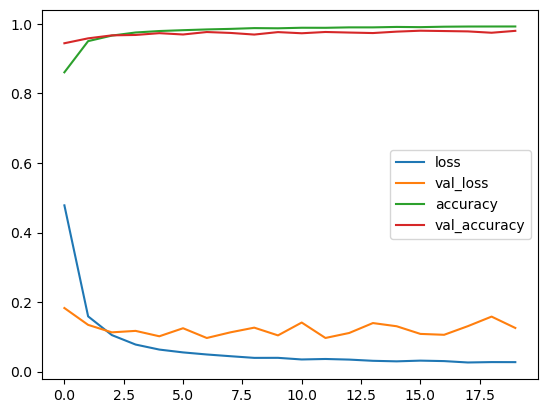

In [13]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot()

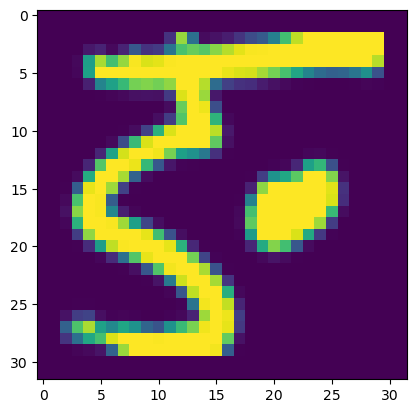

In [27]:
X_images = X.values.reshape((-1,32,32))

plt.imshow(X_images[9855])
plt.show()

In [29]:
imgTrans = X_images[9855].reshape(1,32,32,1)
predictions = model.predict(imgTrans)
binencoder.classes_[np.argmax(predictions)]

1/1 [==============================] - 0s 37ms/step


'character_05_kna'

In [ ]:
|